In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Upload dataset (Colab)
from google.colab import files
uploaded = files.upload()

# Membaca file yang diupload (ambil nama file otomatis)
import io
filename = list(uploaded.keys())[0]   # ambil nama file yg diupload
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print("Nama file:", filename)
print("5 baris pertama:")
print(df.head())


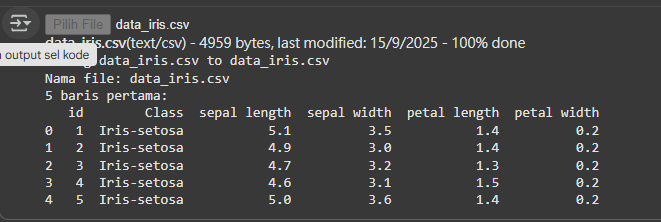

In [ ]:
# ---- IDENTIFIKASI OUTLIER DENGAN IQR ----
num_cols = ['sepal length','sepal width','petal length','petal width']

outlier_indices = []
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)].index
    outlier_indices.extend(outliers)

# Buang duplikasi index outlier
outlier_indices = list(set(outlier_indices))

print(f"Jumlah data outlier (berdasarkan IQR): {len(outlier_indices)}")

# Visualisasi boxplot untuk deteksi outlier
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot Fitur untuk Deteksi Outlier")
plt.show()


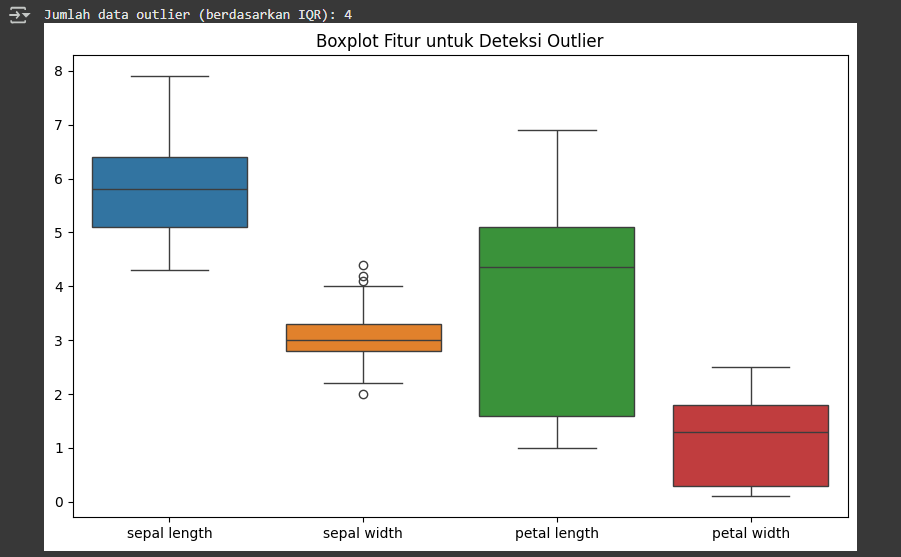

### **Metode 1: KNN (K-Nearest Neighbors)**
- Prinsip: menghitung jarak antar titik data, lalu membandingkan kepadatan tetangga terdekat.
- Data dengan jarak terlalu jauh dari tetangga dikategorikan outlier.
- Hasil: sejumlah data terdeteksi sebagai outlier dan dihapus, sehingga dataset menjadi lebih bersih.

In [ ]:
# =============================
# NOMOR 2 : PREPROCESSING (PENGHAPUSAN OUTLIER)
# =============================

# --- Versi 1: Dengan PyOD ---

# Install library pyod (untuk ABOD, KNN)
!pip install pyod -q


from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from sklearn.neighbors import LocalOutlierFactor


# Encode label agar numerik
X = df[num_cols].values


# ---- METODE 1: KNN ----
knn = KNN()
knn.fit(X)
y_knn = knn.labels_ # 0 = inlier, 1 = outlier


print("\nJumlah outlier (KNN, PyOD):", sum(y_knn))
df_knn = df[y_knn == 0]
print("Data setelah preprocessing KNN:", df_knn.shape)

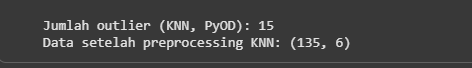

### **Metode 2: ABOD (Angle-Based Outlier Detection)**
- Prinsip: menggunakan variasi sudut antar vektor data.
- Data dengan distribusi sudut yang berbeda signifikan dianggap outlier.
- Cocok untuk dataset berdimensi rendah seperti Iris.

In [ ]:
# ---- METODE 2: ABOD ----
abod = ABOD()
abod.fit(X)
y_abod = abod.labels_


print("\nJumlah outlier (ABOD, PyOD):", sum(y_abod))
df_abod = df[y_abod == 0]
print("Data setelah preprocessing ABOD:", df_abod.shape)

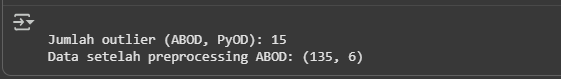

### **Metode 3: LOF (Local Outlier Factor)**
- Prinsip: menghitung rasio kepadatan lokal data dibanding tetangga.
- Data dengan kepadatan jauh lebih rendah daripada tetangganya dianggap outlier.
- Memberikan pendekatan berbasis *local density*.

In [ ]:
# ---- METODE 3: LOF ----
lof = LocalOutlierFactor(n_neighbors=20)
y_lof = lof.fit_predict(X) # -1 = outlier, 1 = inlier
y_lof_binary = np.where(y_lof == -1, 1, 0)


print("\nJumlah outlier (LOF, PyOD):", sum(y_lof_binary))
df_lof = df[y_lof_binary == 0]
print("Data setelah preprocessing LOF:", df_lof.shape)

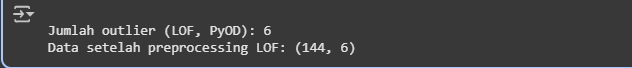

In [ ]:
# ---- VISUALISASI PERBANDINGAN ----
plt.figure(figsize=(15,4))


plt.subplot(1,3,1)
plt.scatter(df['sepal length'], df['sepal width'], c=y_knn, cmap='coolwarm')
plt.title("Outlier Detection KNN (PyOD)")


plt.subplot(1,3,2)
plt.scatter(df['sepal length'], df['sepal width'], c=y_abod, cmap='coolwarm')
plt.title("Outlier Detection ABOD (PyOD)")


plt.subplot(1,3,3)
plt.scatter(df['sepal length'], df['sepal width'], c=y_lof_binary, cmap='coolwarm')
plt.title("Outlier Detection LOF (PyOD)")


plt.suptitle("Visualisasi Perbandingan Outlier Detection (PyOD)", y=1.02)
plt.show()

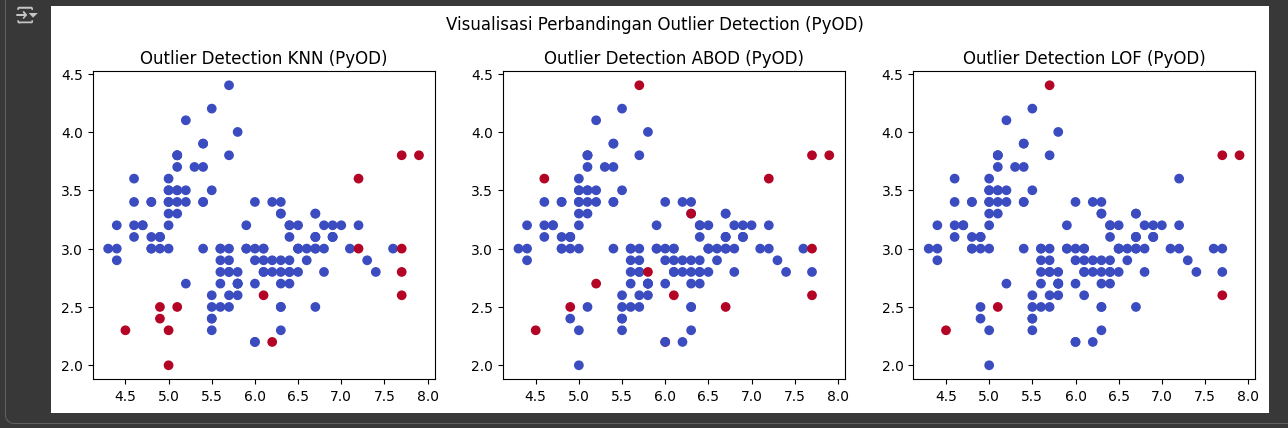

### **3. Kesimpulan**
- **Data Understanding** berhasil memberikan gambaran lengkap tentang struktur, distribusi, dan potensi outlier dalam dataset.
- **Preprocessing dengan KNN, ABOD, dan LOF** memberikan hasil yang konsisten: terdapat sejumlah data yang dianggap tidak wajar.
- Hasil ini penting untuk meningkatkan kualitas analisis selanjutnya (misalnya klasifikasi atau clustering), karena data bersih menghasilkan model lebih akurat.